In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [14]:
# Load the Iris dataset
iris = load_iris()
print("Dataset loaded successfully!")
print(f"Dataset features: {iris.feature_names}")
print(f"Dataset target names: {iris.target_names}")

Dataset loaded successfully!
Dataset features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Dataset target names: ['setosa' 'versicolor' 'virginica']


In [15]:
# Create DataFrame from the dataset
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset converted to DataFrame successfully!")
print(f"Dataset shape: {df.shape}")

Dataset converted to DataFrame successfully!
Dataset shape: (150, 6)


In [16]:
# Data Exploration
print("=== FIRST 5 ROWS (HEAD) ===")
print(df.head())
print("\n=== LAST 5 ROWS (TAIL) ===")
print(df.tail())
print(f"\n=== SHAPE ===")
print(f"Dataset shape: {df.shape}")
print(f"\n=== COLUMNS ===")
print(f"Columns: {list(df.columns)}")
print(f"\n=== DATA INFO ===")
print(df.info())
print(f"\n=== STATISTICAL DESCRIPTION ===")
print(df.describe())

=== FIRST 5 ROWS (HEAD) ===
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

=== LAST 5 ROWS (TAIL) ===
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2           

In [17]:
# Rename certain columns
print("=== RENAMING COLUMNS ===")
print("Original columns:", list(df.columns))

# Rename some columns for better readability
df_renamed = df.rename(columns={
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width'
})

print("After renaming:", list(df_renamed.columns))
df = df_renamed  # Update the main dataframe

=== RENAMING COLUMNS ===
Original columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species', 'species_name']
After renaming: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species', 'species_name']


In [18]:
# Check for null values
print("=== NULL VALUES CHECK ===")
null_counts = df.isnull().sum()
print("Null values per column:")
print(null_counts)
print(f"\nTotal null values: {df.isnull().sum().sum()}")

# Show percentage of missing values
print("\nPercentage of missing values:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
for col, pct in missing_percentage.items():
    if pct > 0:
        print(f"{col}: {pct:.2f}%")
    
if df.isnull().sum().sum() == 0:
    print("No missing values found in the dataset!")

=== NULL VALUES CHECK ===
Null values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_name    0
dtype: int64

Total null values: 0

Percentage of missing values:
No missing values found in the dataset!


In [19]:
# Handle missing values (if any)
print("=== HANDLING MISSING VALUES ===")
print(f"Original dataset shape: {df.shape}")

# Keep a copy before any modifications
df_original = df.copy()

# Since Iris dataset typically has no missing values, we'll just verify
if df.isnull().sum().sum() > 0:
    df_clean = df.dropna()
    print(f"After dropping nulls: {df_clean.shape}")
    print(f"Rows removed: {len(df) - len(df_clean)}")
    df = df_clean
else:
    print("No missing values to handle. Dataset is already clean!")
    df_clean = df.copy()

=== HANDLING MISSING VALUES ===
Original dataset shape: (150, 6)
No missing values to handle. Dataset is already clean!


In [20]:
# Encode categorical values
print("=== ENCODING CATEGORICAL VALUES ===")

# First, let's see the categorical columns and their unique values
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))

for col in categorical_cols:
    print(f"\n{col} unique values: {df[col].unique()}")

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Create a copy for encoding
df_encoded = df.copy()

# Method 1: Label Encoding for species name
le_species = LabelEncoder()
df_encoded['species_name_encoded'] = le_species.fit_transform(df_encoded['species_name'])
print(f"\nSpecies encoding: {dict(zip(le_species.classes_, le_species.transform(le_species.classes_)))}")

# Method 2: One-hot encoding for species
df_encoded = pd.get_dummies(df_encoded, columns=['species_name'], prefix='species')

print(f"\nDataset shape after encoding: {df_encoded.shape}")
print("New columns after one-hot encoding:")
new_cols = [col for col in df_encoded.columns if col not in df.columns]
print(new_cols)

=== ENCODING CATEGORICAL VALUES ===
Categorical columns: ['species_name']

species_name unique values: ['setosa' 'versicolor' 'virginica']

Species encoding: {'setosa': np.int64(0), 'versicolor': np.int64(1), 'virginica': np.int64(2)}

Dataset shape after encoding: (150, 9)
New columns after one-hot encoding:
['species_name_encoded', 'species_setosa', 'species_versicolor', 'species_virginica']


In [21]:
# Verify encoding using head()
print("=== VERIFICATION USING HEAD() ===")
print("Encoded dataset head:")
print(df_encoded.head())

print("\nComparison of original vs encoded (first 5 rows):")
print("Original species_name column:", df['species_name'].head().tolist())
print("Encoded species_name column:", df_encoded['species_name_encoded'].head().tolist())
print("Original species numeric column:", df['species'].head().tolist())

=== VERIFICATION USING HEAD() ===
Encoded dataset head:
   sepal_length  sepal_width  petal_length  petal_width  species  \
0           5.1          3.5           1.4          0.2        0   
1           4.9          3.0           1.4          0.2        0   
2           4.7          3.2           1.3          0.2        0   
3           4.6          3.1           1.5          0.2        0   
4           5.0          3.6           1.4          0.2        0   

   species_name_encoded  species_setosa  species_versicolor  species_virginica  
0                     0            True               False              False  
1                     0            True               False              False  
2                     0            True               False              False  
3                     0            True               False              False  
4                     0            True               False              False  

Comparison of original vs encoded (first 5 rows)

In [22]:
# Group the data
print("=== GROUPING DATA ===")

# Group by species
print("1. Statistics by Species:")
species_stats = df.groupby('species_name')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].agg(['mean', 'std', 'min', 'max'])
print(species_stats)

print("\n2. Count by Species:")
species_counts = df['species_name'].value_counts()
print(species_counts)

print("\n3. Sepal Length Statistics by Species:")
sepal_length_by_species = df.groupby('species_name')['sepal_length'].agg(['count', 'mean', 'median', 'std'])
print(sepal_length_by_species)

print("\n4. Petal Length Statistics by Species:")
petal_length_by_species = df.groupby('species_name')['petal_length'].agg(['count', 'mean', 'median', 'std'])
print(petal_length_by_species)

print("\n5. Cross-tabulation: Species vs Sepal Length Ranges:")
# Create bins for sepal length
df['sepal_length_range'] = pd.cut(df['sepal_length'], bins=3, labels=['Small', 'Medium', 'Large'])
cross_tab = pd.crosstab(df['species_name'], df['sepal_length_range'], margins=True)
print(cross_tab)

=== GROUPING DATA ===
1. Statistics by Species:
             sepal_length                     sepal_width                      \
                     mean       std  min  max        mean       std  min  max   
species_name                                                                    
setosa              5.006  0.352490  4.3  5.8       3.428  0.379064  2.3  4.4   
versicolor          5.936  0.516171  4.9  7.0       2.770  0.313798  2.0  3.4   
virginica           6.588  0.635880  4.9  7.9       2.974  0.322497  2.2  3.8   

             petal_length                     petal_width                      
                     mean       std  min  max        mean       std  min  max  
species_name                                                                   
setosa              1.462  0.173664  1.0  1.9       0.246  0.105386  0.1  0.6  
versicolor          4.260  0.469911  3.0  5.1       1.326  0.197753  1.0  1.8  
virginica           5.552  0.551895  4.5  6.9       2.026  0.2746

=== CREATING HISTOGRAMS ===


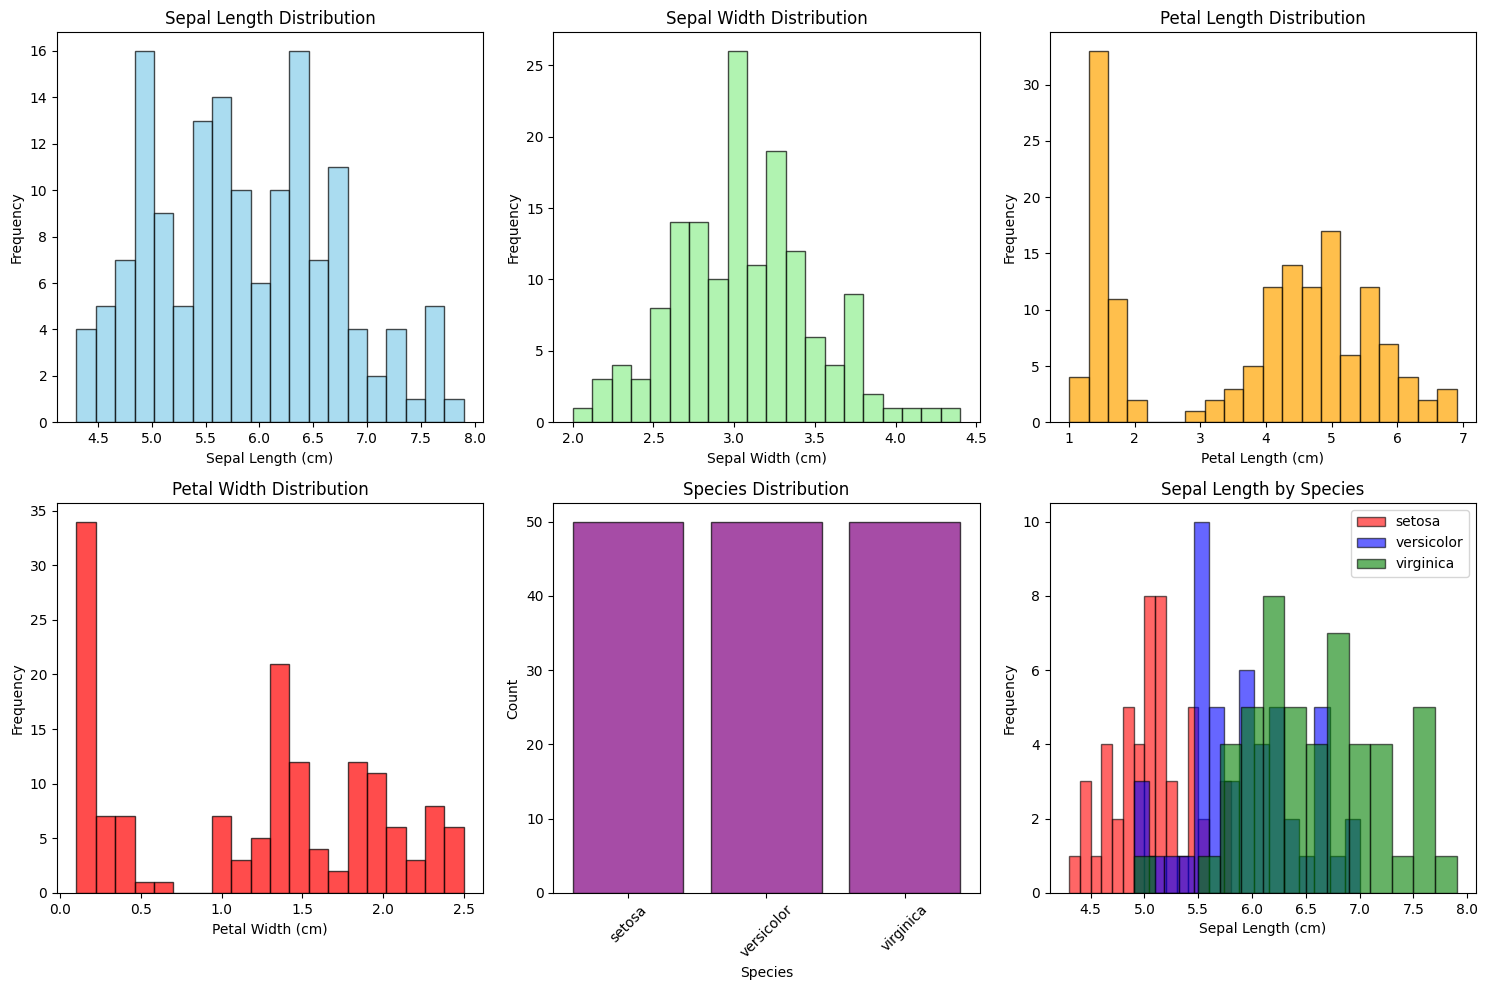

In [23]:
# Create histograms
print("=== CREATING HISTOGRAMS ===")
plt.figure(figsize=(15, 10))

# Histogram 1: Sepal Length distribution
plt.subplot(2, 3, 1)
plt.hist(df['sepal_length'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Sepal Length Distribution')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')

# Histogram 2: Sepal Width distribution
plt.subplot(2, 3, 2)
plt.hist(df['sepal_width'], bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
plt.title('Sepal Width Distribution')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')

# Histogram 3: Petal Length distribution
plt.subplot(2, 3, 3)
plt.hist(df['petal_length'], bins=20, color='orange', alpha=0.7, edgecolor='black')
plt.title('Petal Length Distribution')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')

# Histogram 4: Petal Width distribution
plt.subplot(2, 3, 4)
plt.hist(df['petal_width'], bins=20, color='red', alpha=0.7, edgecolor='black')
plt.title('Petal Width Distribution')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')

# Histogram 5: Species distribution
plt.subplot(2, 3, 5)
species_counts = df['species_name'].value_counts()
plt.bar(species_counts.index, species_counts.values, color='purple', alpha=0.7, edgecolor='black')
plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Histogram 6: Sepal Length by Species (overlaid)
plt.subplot(2, 3, 6)
colors = ['red', 'blue', 'green']
for i, species in enumerate(df['species_name'].unique()):
    species_data = df[df['species_name'] == species]['sepal_length']
    plt.hist(species_data, bins=15, alpha=0.6, label=species, color=colors[i], edgecolor='black')
plt.title('Sepal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

=== CREATING SCATTER PLOTS ===


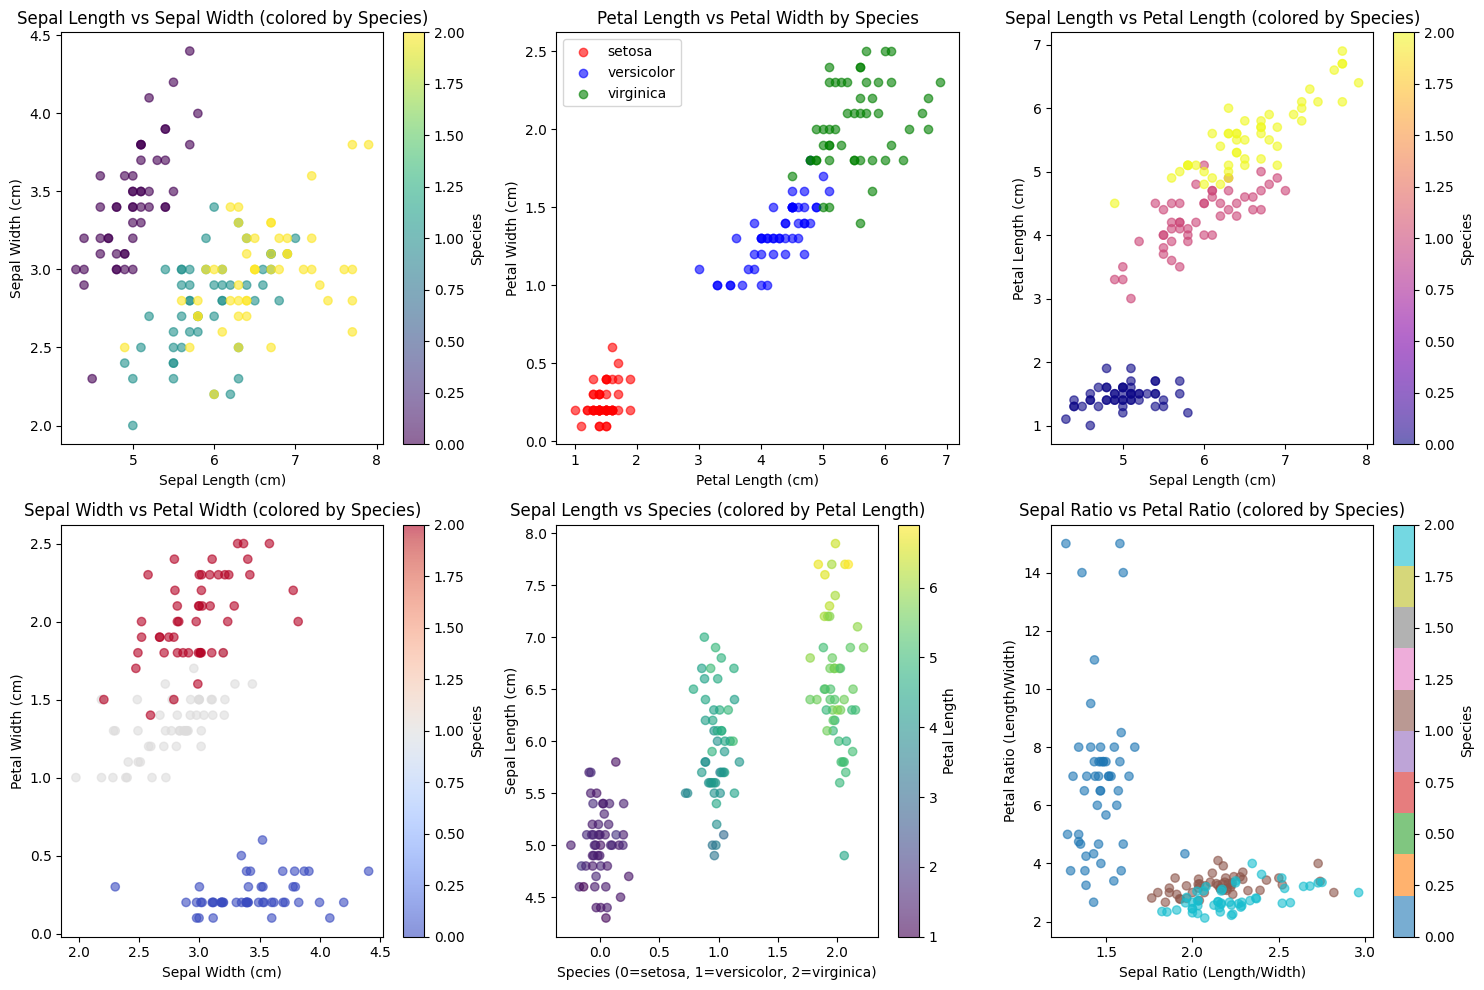

In [24]:
# Create scatter plots
print("=== CREATING SCATTER PLOTS ===")
plt.figure(figsize=(15, 10))

# Scatter plot 1: Sepal Length vs Sepal Width
plt.subplot(2, 3, 1)
plt.scatter(df['sepal_length'], df['sepal_width'], alpha=0.6, c=df['species'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width (colored by Species)')
plt.colorbar(label='Species')

# Scatter plot 2: Petal Length vs Petal Width
plt.subplot(2, 3, 2)
colors = ['red', 'blue', 'green']
for i, species in enumerate(df['species_name'].unique()):
    species_data = df[df['species_name'] == species]
    plt.scatter(species_data['petal_length'], species_data['petal_width'], 
               alpha=0.6, c=colors[i], label=species)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width by Species')
plt.legend()

# Scatter plot 3: Sepal Length vs Petal Length
plt.subplot(2, 3, 3)
plt.scatter(df['sepal_length'], df['petal_length'], 
           alpha=0.6, c=df['species'], cmap='plasma')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs Petal Length (colored by Species)')
plt.colorbar(label='Species')

# Scatter plot 4: Sepal Width vs Petal Width
plt.subplot(2, 3, 4)
import numpy as np
jitter = np.random.normal(0, 0.02, len(df))
plt.scatter(df['sepal_width'] + jitter, df['petal_width'], 
           alpha=0.6, c=df['species'], cmap='coolwarm')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Sepal Width vs Petal Width (colored by Species)')
plt.colorbar(label='Species')

# Scatter plot 5: Sepal Length vs Species (with jitter)
plt.subplot(2, 3, 5)
species_numeric = df['species']
jitter = np.random.normal(0, 0.1, len(df))
plt.scatter(species_numeric + jitter, df['sepal_length'], 
           alpha=0.6, c=df['petal_length'], cmap='viridis')
plt.xlabel('Species (0=setosa, 1=versicolor, 2=virginica)')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Length vs Species (colored by Petal Length)')
plt.colorbar(label='Petal Length')

# Scatter plot 6: Petal ratio vs Sepal ratio
plt.subplot(2, 3, 6)
df['petal_ratio'] = df['petal_length'] / df['petal_width']
df['sepal_ratio'] = df['sepal_length'] / df['sepal_width']
plt.scatter(df['sepal_ratio'], df['petal_ratio'], 
           alpha=0.6, c=df['species'], cmap='tab10')
plt.xlabel('Sepal Ratio (Length/Width)')
plt.ylabel('Petal Ratio (Length/Width)')
plt.title('Sepal Ratio vs Petal Ratio (colored by Species)')
plt.colorbar(label='Species')

plt.tight_layout()
plt.show()